In [1]:
import sys
import os
import numpy as np
from importlib import reload

sys.path.insert(0, '../src')
import deepgeo.dataset.rasterizer as rstzr
import deepgeo.common.filesystem as fs
import deepgeo.common.visualization as vis

reload(rstzr)
reload(fs)
reload(vis)

%matplotlib inline

/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Input Files
DATA_DIR = '/home/raian/doutorado/Dados/generated'
shape_file = os.path.join(DATA_DIR, 'Prodes_mosaic.shp')
rasters_dir = os.path.join(DATA_DIR, 'images_5bands')
raster_files = [os.path.join(rasters_dir, 'mosaic_2013.tif'),
                os.path.join(rasters_dir, 'mosaic_2014.tif'),
                os.path.join(rasters_dir, 'mosaic_2015.tif'),
                os.path.join(rasters_dir, 'mosaic_2016.tif'),
                os.path.join(rasters_dir, 'mosaic_2017.tif'),
                os.path.join(rasters_dir, 'mosaic_2018.tif')]

years = [2013, 2014, 2015, 2016, 2017, 2018]

classes_of_interest = {}
for year in years:
    classes_of_interest[year] = [['d' + str(i) for i in range(2007, year + 1)] + ['r' + str(i) for i in range(2010, year + 1)],
                                 ['NAO_FLORESTA', 'NAO_FLORESTA2']]
    
non_class = 'not_deforestation'
class_column = 'class_name'
class_names = ['not_deforestation', 'deforestation', 'not_forest']
pos_qa_band = 0

# Output Files
output_path = os.path.join(DATA_DIR, 'labels_with_non_forest')
fs.mkdir(output_path)
out_labels = [os.path.join(output_path, 'labels_cloudless_2013.tif'),
              os.path.join(output_path, 'labels_cloudless_2014.tif'),
              os.path.join(output_path, 'labels_cloudless_2015.tif'),
              os.path.join(output_path, 'labels_cloudless_2016.tif'),
              os.path.join(output_path, 'labels_cloudless_2017.tif'),
              os.path.join(output_path, 'labels_cloudless_2018.tif')]

SHAPE:  (11534, 13587, 1)
UNIQUE:  [1 2 3 4 --]
TYPE:  int32
SHAPE:  (11534, 13587, 1)
UNIQUE:  [1 2 3 4 --]
TYPE:  int32
SHAPE:  (11534, 13587, 1)
UNIQUE:  [1 2 3 4 --]
TYPE:  int32
SHAPE:  (11534, 13587, 1)
UNIQUE:  [1 2 3 4 --]
TYPE:  int32
SHAPE:  (11534, 13587, 1)
UNIQUE:  [1 2 3 4 --]
TYPE:  int32
SHAPE:  (11534, 13587, 1)
UNIQUE:  [1 2 3 4 --]
TYPE:  int32


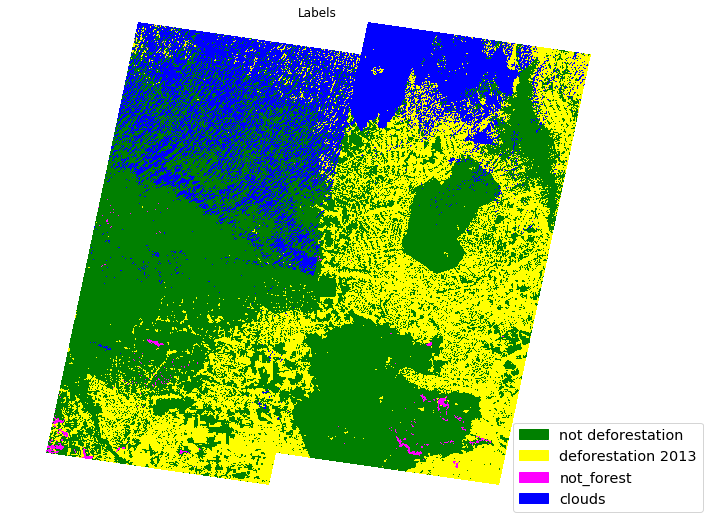

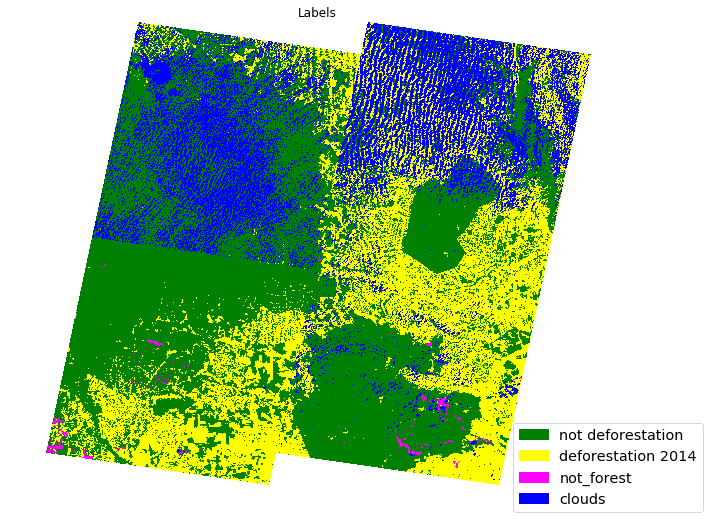

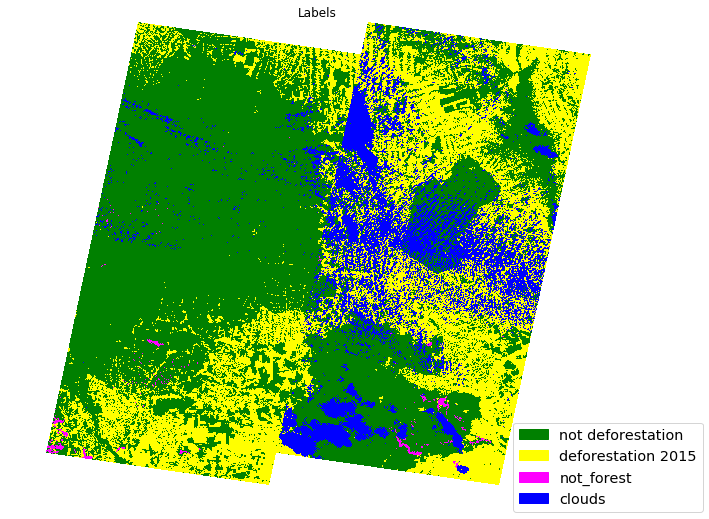

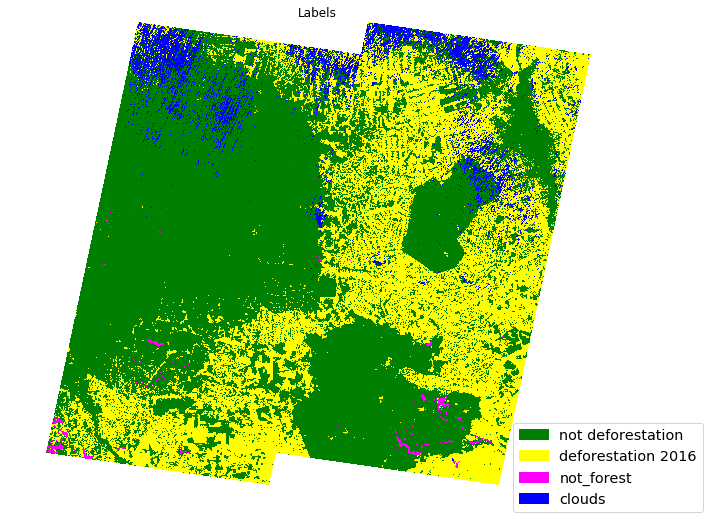

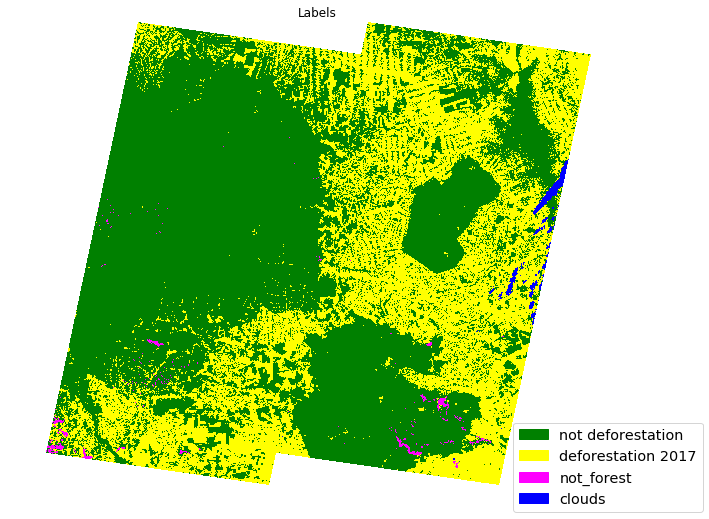

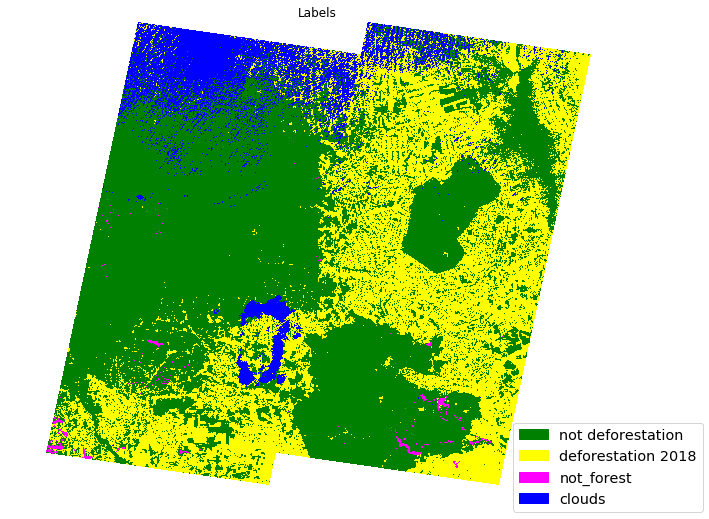

In [3]:
for i, year in enumerate(years):
    rasterizer = rstzr.Rasterizer(shape_file,
                                  raster_files[i],
                                  class_column,
                                  classes_interest=classes_of_interest[year],
                                  non_class_name=non_class)

    rasterizer.collect_class_names()
    rasterizer.rasterize_layer()
    m_class_names = ['no_data'] + rasterizer.get_class_names()
    rasterizer.remove_labels_under_cloud(pos_qa=pos_qa_band, new_label=len(m_class_names))
    rasterized_layer = rasterizer.get_labeled_raster()
    rasterizer.save_labeled_raster_to_gtiff(out_labels[i])
    
    m_class_names = ['not deforestation', 'deforestation %d' % year, 'not_forest', 'clouds']
    
    print('SHAPE: ', rasterized_layer.shape)
    print('UNIQUE: ', np.unique(rasterized_layer))
    print('TYPE: ', rasterized_layer.dtype)
    
    vis.plot_labels(rasterized_layer, m_class_names, colors=['green', 'yellow', 'magenta', 'blue'])